In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
NAICS = pd.read_excel('Fairlead Approved Vendor NAICS Codes.xlsx')

## Data Preprocessing

In [3]:
NAICS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3769 entries, 0 to 3768
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VEND_APPRVL_CD  3769 non-null   object 
 1   COMPANY_ID      3769 non-null   int64  
 2   VEND_ID         3769 non-null   object 
 3   VEND_NAME       3769 non-null   object 
 4   OPP_NAICS_CD    3714 non-null   float64
 5   OPP_NAICS_DESC  3769 non-null   object 
 6   PRIME_NAIC      3769 non-null   object 
 7   DUNS_NO         3757 non-null   object 
 8   CAGE_CD         3697 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 265.1+ KB


In [4]:
NAICS.isnull().sum()

VEND_APPRVL_CD     0
COMPANY_ID         0
VEND_ID            0
VEND_NAME          0
OPP_NAICS_CD      55
OPP_NAICS_DESC     0
PRIME_NAIC         0
DUNS_NO           12
CAGE_CD           72
dtype: int64

In [5]:
NAICS.dropna(inplace=True)

In [6]:
NAICS.reset_index(drop=True,inplace=True)

In [7]:
NAICS['OPP_NAICS_CD'] = NAICS['OPP_NAICS_CD'].astype(str)

In [8]:
NAICS.shape

(3667, 9)

### Number of Unique VEND_ID Based on PRIME_NAIC 

In [9]:
NAICS['VEND_ID'].nunique()

816

In [10]:
len(NAICS[NAICS['PRIME_NAIC']=='Y'])

582

In [11]:
len(NAICS[NAICS['PRIME_NAIC']=='N'])

3085

In [12]:
g=NAICS.groupby('VEND_ID').agg(set).reset_index()
g.head()

,VEND_ID,VEND_APPRVL_CD,COMPANY_ID,VEND_NAME,OPP_NAICS_CD,OPP_NAICS_DESC,PRIME_NAIC,DUNS_NO,CAGE_CD
0,100-02,{A},{2},"{SPIVEY DISPOSAL, LLC }",{562998.0},{All Other Miscellaneous Waste Management Serv...,{N},{145902990},{54KV4}
1,10000,{A},{7},{ABS AMERICAS},"{541620.0, 238220.0, 541614.0, 561210.0, 54161...",{Administrative Management and General Managem...,"{Y, N}",{044710341},{2B704}
2,10050,{A},{7},{ACCURATE MARINE ENVIRONME},"{483211.0, 562112.0, 213112.0, 562119.0, 56291...",{Commercial and Industrial Machinery and Equip...,"{Y, N}",{933770448},{1FLA3}
3,101-02,{A},{2},{K.R. CAMPBELL INC. DBA HO},{334515.0},{Instrument Manufacturing for Measuring and Te...,{N},{032212990},{07KK8}
4,10166,{A},{7},{ADVANCED DESIGN},"{332999.0, 332812.0, 339950.0, 323113.0}","{Metal Coating, Engraving (except Jewelry and ...","{Y, N}",{556464824},{0BX13 }


In [23]:
# len(g[g['PRIME_NAIC']=={'N'}])

In [24]:
# len(g[g['PRIME_NAIC']=={'Y'}])

In [25]:
# len(g[g['PRIME_NAIC']=={'N','Y'}])

In [26]:
NAICS_Y = NAICS[NAICS['PRIME_NAIC']=='Y']
# NAICS_Y['VEND_ID'].nunique()
NAICS_Y.shape

(582, 9)

In [27]:
NAICS_N= g[g['PRIME_NAIC']=={'N'}]
# NAICS_N['VEND_ID'].nunique()
NAICS_N.shape

(234, 9)

In [28]:
df_NAICS= pd.concat([NAICS_Y, NAICS_N]).reset_index(drop = True)
df_NAICS.shape

(816, 9)

## Fairlead_OnTime data

In [29]:
Fairlead_OnTime = pd.read_csv('FairleadOnTimeDeliveryFBW-FINT _Range 3-1-21 _3-1-22.csv')

In [30]:
Fairlead_OnTime.head()

,COMPANY_ID,PO_ID,PO_LN_NO,ITEM_ID,RECPT_LN_DESC,DUE_DT,RECPT_DT,RECPT_ID,RECV_UM_CD,RECV_QTY,...,ACCPT_AMT,REJ_AMT,PROJ_ID,VEND_ID,VEND_LONG_NAME,PO_LINE#,ON_TIME_TEST,WEEK_RECPT_DT,YEAR_RECPT_DT,DAYS_LATE
0,7,FBW2014701,1,3M 6885,"LENS COVER, FOR 6800 RESPIRATOR, 25/BAG",4/2/2021,3/29/2021,POR0013976,BAG,2.0,...,89.00,0.0,07OHD.GENR.03.01,10150,ADVANCE SAFETY EQUIPMENT CO.,FBW2014701_1,On Time,14,2021,0
1,7,FBW2017059,1,70156521,"ACCESSORY, BOOT, SILICONE RUBBER POLYMER, BRAS...",12/1/2021,11/15/2021,POR-003612,EA,40.0,...,100.00,0.0,D1905.0001.08,11525,AWC - ALLIED WIRE & CABLE,FBW2017059_1,On Time,47,2021,0
2,7,FBW2017059,2,M24308/2-1F,"D-SUB MIL SPEC CONNECTOR 9P RECEPTACLE, FEMALE...",12/1/2021,11/15/2021,POR-003612,PC,4.0,...,117.04,0.0,D1905.0001.08,11525,AWC - ALLIED WIRE & CABLE,FBW2017059_2,On Time,47,2021,0
3,7,FBW2017059,3,M24308/4-1F,D-SUB MIL SPEC CONNECTORS D-SUB 9P MALE CRIMP ...,12/1/2021,11/15/2021,POR-003612,PC,4.0,...,91.40,0.0,D1905.0001.08,11525,AWC - ALLIED WIRE & CABLE,FBW2017059_3,On Time,47,2021,0
4,2,F205550,1,HWS600-24/HD,"POWER SUPPLY, 120VAC/24VDC, 600 WATTS",7/30/2021,3/25/2021,POR-012975,EA,6.0,...,3551.52,0.0,20549.0003.01,120009,"ALLIED ELECTRONICS, INC.",F205550_1,On Time,13,2021,0


In [31]:
Fairlead_OnTime.shape

(13963, 23)

In [32]:
Fairlead_OnTime.isnull().sum()

COMPANY_ID        0
PO_ID             0
PO_LN_NO          0
ITEM_ID           0
RECPT_LN_DESC     0
DUE_DT            0
RECPT_DT          0
RECPT_ID          0
RECV_UM_CD        1
RECV_QTY          0
ACCPT_QTY         0
REJ_QTY           0
RECV_AMT          0
ACCPT_AMT         0
REJ_AMT           0
PROJ_ID           4
VEND_ID           0
VEND_LONG_NAME    0
PO_LINE#          0
ON_TIME_TEST      0
WEEK_RECPT_DT     0
YEAR_RECPT_DT     0
DAYS_LATE         0
dtype: int64

In [33]:
Fairlead_OnTime.dropna(inplace = True)

In [34]:
Fairlead_OnTime.reset_index(drop=True,inplace=True)

In [35]:
Fairlead_OnTime.shape

(13958, 23)

## number of orders (PO_ID) placed to each vendor aggregated by NAICS code

In [36]:
merged_df_NAICS_Fairlead = pd.merge(df_NAICS,Fairlead_OnTime, how='inner',on ='VEND_ID')

In [37]:
merged_df_NAICS_Fairlead.shape

(12610, 31)

In [38]:
merged_df_NAICS_Fairlead[['PO_ID','VEND_ID']].head()

,PO_ID,VEND_ID
0,IPC003583,120005
1,IPC003583,120005
2,IPC003583,120005
3,IPC003583,120005
4,F205550,120009


In [40]:
# merged_df_NAICS_Fairlead['VEND_ID'].value_counts()

In [41]:
No_Order_VEND=merged_df_NAICS_Fairlead.groupby('VEND_ID')['PO_ID'].agg('unique').reset_index()
No_Order_VEND

,VEND_ID,PO_ID
0,10166,"[FBW2014461, FBW2014621, FBW2015240, FBW201524..."
1,10760,"[FBW2014153, FBW2016055, FBW2016319, FBW2016559]"
2,11525,[FBW2017059]
3,11540,"[FBW2015948, FBW2015950]"
4,120005,[IPC003583]
...,...,...
264,M58946,"[F206636, F206381, F205793, F206243, F206270, ..."
265,M59211,[F206803]
266,M59355,[F206423]
267,M59403,"[F207041, F207040]"


In [42]:
No_Order_VEND['Count_PO_ID'] = No_Order_VEND['PO_ID'].apply (lambda x:len(x))

In [43]:
No_Order_VEND.head()

,VEND_ID,PO_ID,Count_PO_ID
0,10166,"[FBW2014461, FBW2014621, FBW2015240, FBW201524...",10
1,10760,"[FBW2014153, FBW2016055, FBW2016319, FBW2016559]",4
2,11525,[FBW2017059],1
3,11540,"[FBW2015948, FBW2015950]",2
4,120005,[IPC003583],1


In [44]:
No_Order_VEND['Count_PO_ID'].describe()

count    269.000000
mean      13.791822
std       33.325080
min        1.000000
25%        1.000000
50%        4.000000
75%        9.000000
max      284.000000
Name: Count_PO_ID, dtype: float64

In [45]:
merged_df_NAICS_Fairlead['PO_ID'].nunique()

3710

## NO. of Orders per VEND_ID for Orders higher than 30

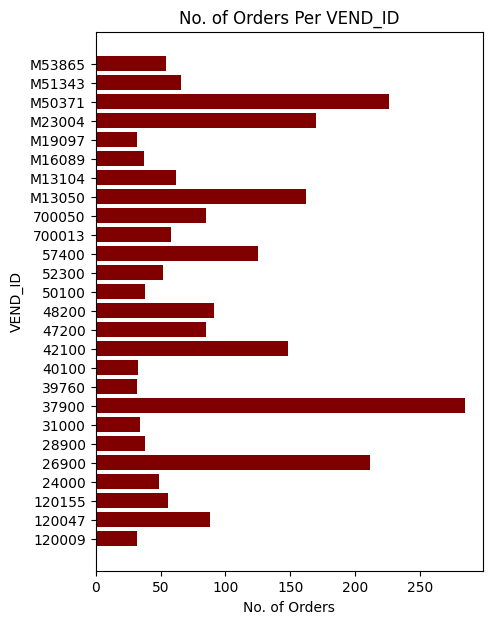

In [46]:
fig = plt.figure(figsize =(5, 7))

plt.barh(No_Order_VEND[No_Order_VEND['Count_PO_ID']>30]['VEND_ID'], No_Order_VEND[No_Order_VEND['Count_PO_ID']>30]['Count_PO_ID'], color ='maroon')
 
plt.xlabel("No. of Orders")
plt.ylabel("VEND_ID")
plt.title("No. of Orders Per VEND_ID")
plt.show()

##  number of Orders ordered for each ITEM_ID aggregated by NAICS code

In [47]:
Fairlead_OnTime.shape

(13958, 23)

In [48]:
Fairlead_OnTime['ITEM_ID'].count()

13958

In [49]:
merged_df_NAICS_Fairlead['ITEM_ID'].value_counts()

G01 SP101-300    73
HAZ MAT          70
G01 LP033        46
ARC3 DELIVERY    35
G01 OX300        34
                 ..
21936Q            1
21917Q            1
D4A-C00           1
600RJ-6           1
2VHX2             1
Name: ITEM_ID, Length: 7887, dtype: int64

In [52]:
No_Order_ITEM = merged_df_NAICS_Fairlead.groupby('ITEM_ID')['PO_ID'].agg('unique').reset_index()
No_Order_ITEM['Count_PO_ID'] = No_Order_ITEM['PO_ID'].apply (lambda x:len(x))
# No_Order_ITEM.head()

In [53]:
No_Order_ITEM['Count_PO_ID'].describe()

count    7887.000000
mean        1.373272
std         1.002222
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        36.000000
Name: Count_PO_ID, dtype: float64

In [54]:
merged_df_NAICS_Fairlead['ITEM_ID'].count()

12610

In [55]:
merged_df_NAICS_Fairlead['ITEM_ID'].nunique()

7887

## No. of Orders per ITEM_ID for orders higher than 6

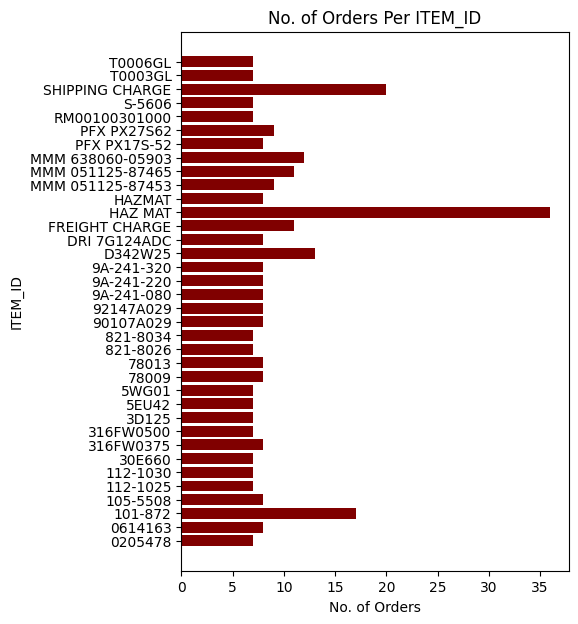

In [56]:
fig = plt.figure(figsize =(5, 7))

plt.barh(No_Order_ITEM[No_Order_ITEM['Count_PO_ID']>6]['ITEM_ID'], No_Order_ITEM[No_Order_ITEM['Count_PO_ID']>6]['Count_PO_ID'], color ='maroon')
 
plt.xlabel("No. of Orders")
plt.ylabel("ITEM_ID")
plt.title("No. of Orders Per ITEM_ID")
plt.show()